In [2]:
import os
import torch
import cv2
from torchvision import transforms
from torch.utils.data import Dataset

from torch.utils.data import DataLoader
from utils.datasets import PoseDataset
import matplotlib.pyplot as plt
from misc.helper_functions import denormalize_image



In [3]:
dataset_dir = 'dataset/testdata-1/test'
dataset = PoseDataset(dataset_dir=dataset_dir, is_train=True, vis_enabled='True')



loading annotations from:  dataset/testdata-1/test/labels/labels.csv


100%|██████████| 46/46 [00:00<00:00, 761.36it/s]


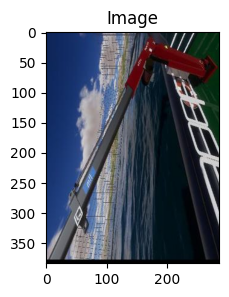

weights tensor([[[ 0.],
         [ 1.],
         [ 0.],
         [ 1.],
         [ 0.],
         [ 1.],
         [-1.],
         [-1.]]], dtype=torch.float64)
{'imgId': 'rgb_426.jpg', 'imgPath': 'dataset/testdata-1/test/images/rgb_426.jpg', 'keypts': array([[  247.01,    61.94],
       [  247.01,    48.6 ],
       [  173.55,    33.35],
       [  178.34,    17.15],
       [   63.88,   300.15],
       [   53.77,   303.96],
       [-1013.06,  2928.12],
       [-3744.  ,  9382.75]]), 'keypts_visibility': array([[ 0.,  0.],
       [ 1.,  1.],
       [ 0.,  0.],
       [ 1.,  1.],
       [ 0.,  0.],
       [ 1.,  1.],
       [-1., -1.],
       [-1., -1.]])}


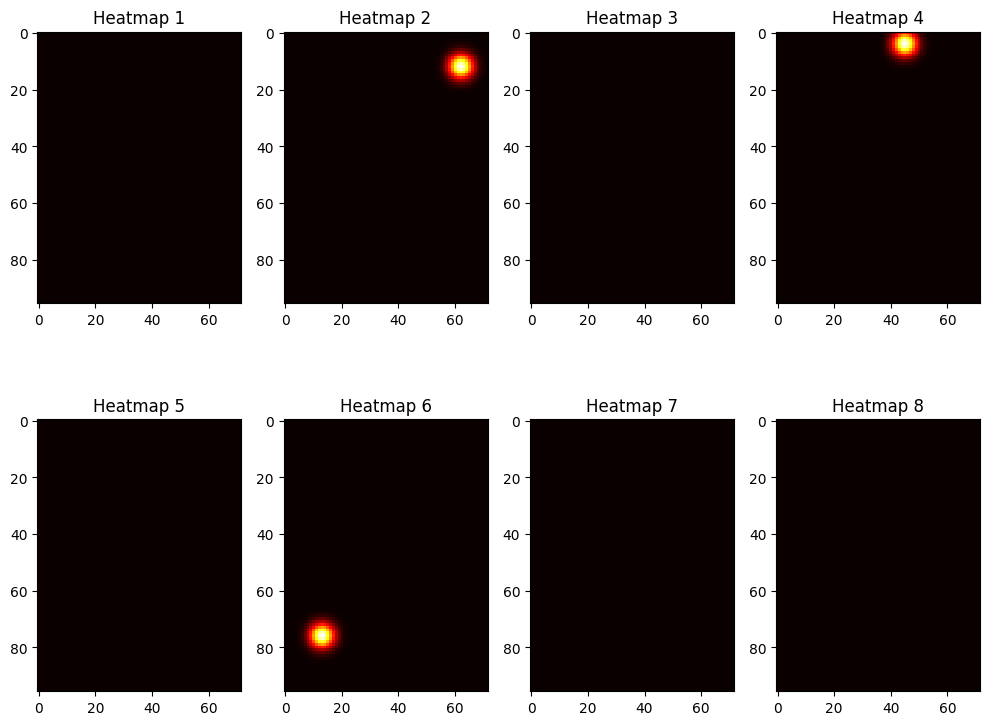

In [5]:

image, heatmaps_gt, target_weight, sample_data = dataset.__getitem__(3)
#image = denormalize_image(image.cpu(), mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
target_weight = torch.from_numpy(target_weight).unsqueeze(0)
print("weights",target_weight)
print(sample_data)


heatmaps_gt = torch.from_numpy(heatmaps_gt).unsqueeze(0)

# Convert the tensor to a numpy array
heatmaps_np = heatmaps_gt.squeeze().numpy()



# Create subplots with 2 rows and appropriate number of columns
num_heatmaps = heatmaps_np.shape[0]
num_cols = num_heatmaps if num_heatmaps <= 4 else 4
num_rows = 2 if num_heatmaps > 4 else 1

fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 8))

# Plot each heatmap
for i in range(num_heatmaps):
    row_index = 0 if i < 4 else 1
    col_index = i if i < 4 else i - 4
    axs[row_index, col_index].imshow(heatmaps_np[i], cmap='hot', interpolation='nearest')
    axs[row_index, col_index].set_title(f'Heatmap {i+1}')

# Adjust layout
plt.tight_layout()
plt.show()



In [ ]:
"""#Resize images in your dataset:

# Define your directory containing the images
image_directory = './heatmapdataset/images'

# Desired output size
image_width = 288
image_height = 384

# Loop through all the files in the directory
for file_name in os.listdir(image_directory):
    file_path = os.path.join(image_directory, file_name)
    
    # Check if the file is an image based on its extension
    if file_path.lower().endswith(('.png', '.jpg', '.jpeg')):
        # Read the image
        img = cv2.imread(file_path)
        
        # Resize the image
        resized_img = cv2.resize(img, (image_width, image_height))
        
        # Save the resized image back to the same location, overwriting the original
        cv2.imwrite(file_path, resized_img)
        print(f'Resized and replaced: {file_path}')
"""

In [4]:

normalized_coordinates = [
    [0.39, 0.80, 0.35, 0.62, 0.52, 0.66, 0.39, 0.78, 0.35, 0.61, 0.52, 0.65],
    [0.38, 0.81, 0.34, 0.62, 0.57, 0.61, 0.39, 0.79, 0.36, 0.61, 0.57, 0.60],
    [0.36, 0.82, 0.34, 0.62, 0.53, 0.49, 0.39, 0.80, 0.37, 0.61, 0.54, 0.49],
    [0.36, 0.82, 0.34, 0.62, 0.56, 0.47, 0.39, 0.80, 0.37, 0.61, 0.56, 0.47]
]

image_size = (640, 640)  # Width x Height

pixel_coordinates = []
for coords in normalized_coordinates:
    pixel_coords = []
    for i in range(0, len(coords), 2):
        x_normalized, y_normalized = coords[i], coords[i + 1]
        x_pixel = int(x_normalized * image_size[0])
        y_pixel = int(y_normalized * image_size[1])
        pixel_coords.extend([x_pixel, y_pixel])
    pixel_coordinates.append(pixel_coords)

print(pixel_coordinates)


[[249, 512, 224, 396, 332, 422, 249, 499, 224, 390, 332, 416], [243, 518, 217, 396, 364, 390, 249, 505, 230, 390, 364, 384], [230, 524, 217, 396, 339, 313, 249, 512, 236, 390, 345, 313], [230, 524, 217, 396, 358, 300, 249, 512, 236, 390, 358, 300]]
